# Capstone Project: Student Performance Analysis (UCI Dataset)
This notebook analyzes how demographic, socio‑economic, and academic factors affect student performance using the [UCI Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

**Setup**  
1. Download and extract `student-mat.csv` (Math) or `student-por.csv` (Portuguese) from the UCI link above.  
2. Place the CSV in the same folder as this notebook before running.

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install sklearn.pipeline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.pipeline (from versions: none)
ERROR: No matching distribution found for sklearn.pipeline


In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [ucimlrepo]
   ---------------------------------------- 2/2 [ucimlrepo]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set(style='whitegrid')

In [7]:
# --- Load data ---
csv_path = 'student-mat.csv'  # Change to 'student-por.csv' if preferred
df = pd.read_csv(csv_path, sep=';')
print('Shape:', df.shape)
df.head()

Shape: (0, 1)


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"


In [8]:
# --- Inspect data ---
df.info()
print('\nMissing values per column:\n', df.isna().sum().sort_values(ascending=False).head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                               --------------  ----- 
 0   school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3  0 non-null      object
dtypes: object(1)
memory usage: 132.0+ bytes

Missing values per column:
 school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reas

In [14]:
# --- Target variable ---
df = pd.read_csv("C:\AUCA notes\Big Data\Final Project\student-por.csv", sep=';')
df['pass'] = (df['G3'] >= 10).astype(int)
df['pass'].value_counts()

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\User\AppData\Local\Temp\ipykernel_55264\749194411.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\AUCA notes\Big Data\Final Project\student-por.csv", sep=';')


pass
1    549
0    100
Name: count, dtype: int64

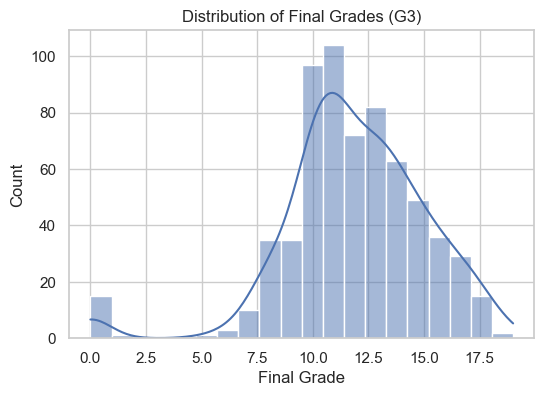

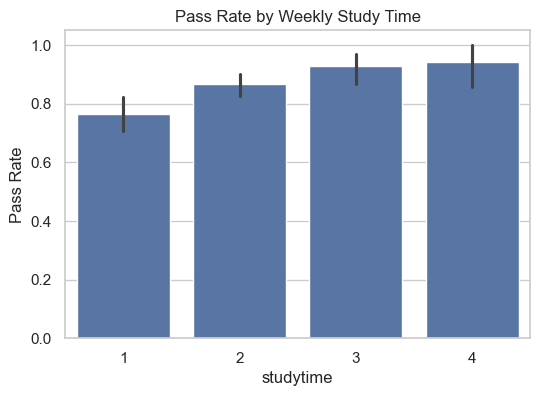

In [15]:
# --- Exploratory analysis ---
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='studytime', y='pass', data=df, estimator=np.mean)
plt.title('Pass Rate by Weekly Study Time')
plt.ylabel('Pass Rate')
plt.show()

In [15]:
try:
    clf
except NameError:
    print("Pipeline 'clf' is not defined. Please run the cell where you trained the model first.")


Pipeline 'clf' is not defined. Please run the cell where you trained the model first.


In [16]:
# --- Modeling ---
X = df.drop(columns=['G3', 'pass'])
y = df['pass']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])

model = RandomForestClassifier(n_estimators=200, random_state=42)

clf = Pipeline(steps=[('preprocess', preprocess), ('model', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.94      0.95      0.94       110

    accuracy                           0.90       130
   macro avg       0.81      0.80      0.80       130
weighted avg       0.90      0.90      0.90       130



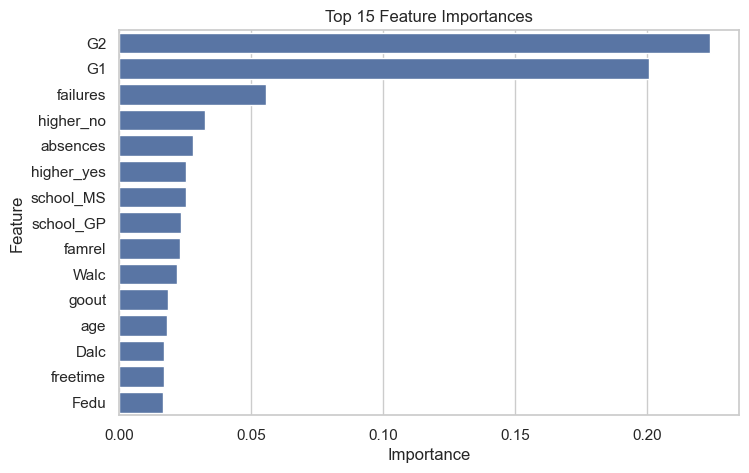

In [17]:
# --- Feature importance ---
rf = clf.named_steps['model']
ohe = clf.named_steps['preprocess'].named_transformers_['cat']
ohe_feats = ohe.get_feature_names_out(categorical_cols)
feature_names = list(ohe_feats) + numerical_cols
importances = pd.Series(rf.feature_importances_, index=feature_names)
top_imp = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_imp.values, y=top_imp.index)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()